In [2]:
import numpy as np
import pandas as pd
from pyne import data, nucname
from pyne.material import Material
from matplotlib import pyplot as plt

%matplotlib inline

In [15]:
results_path = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'

## Read in 1 File of Gamma Spectra

### Find closest match to former idx 133717

ReactorType            bwr

CoolingTime        1795.41

Enrichment            4.22

Burnup             44454.3

OrigenReactor      ge7x7-0

AvgPowerDensity         22

ModDensity             0.7

In [16]:
db = pd.read_pickle(results_path + 'nuc32_activities_scaled_1g_reindex.pkl')

In [18]:
def find_sample(rxtr, orxtr, modd, pwr, cools, burns, enris):
    sub = db.loc[(db['ReactorType'] == rxtr)  & 
                 (db['OrigenReactor'] == orxtr)  & 
                 (db['ModDensity'] == modd)  & 
                 (db['AvgPowerDensity'] == pwr)  & 
                 (db['CoolingTime'] > cools[0]) & (db['CoolingTime'] < cools[1]) & 
                 (db['Burnup'] > burns[0]) & (db['Burnup'] < burns[1]) & 
                 (db['Enrichment'] > enris[0]) & (db['Enrichment'] < enris[1])
                ]
    return sub
find_sample('bwr', 'ge7x7-0', 0.7, 22, [1500, 2200], [44000, 45000], [4.0, 4.4])
#133717 --> 66796

### idx 66796

In [19]:
#detector_dir = 'detector_response/d1_hpge/'
detector_dir = 'detector_response/d2_detective_hpge/'
numcol = 8192
#detector_dir = 'detector_response/d5_labr3/'
#numcol = 1024
detector_path = results_path + detector_dir

In [20]:
datidx = '742'
datgz = detector_path + datidx + '.dat.gz'

In [21]:
def get_energy_bins(bindata):
    with open(bindata) as binfile:
        contents = binfile.readlines()
    binlist = []
    for ebin in contents[1].strip().split(' '):
        binlist.append(float(ebin))
    return binlist
energy_bins = get_energy_bins(detector_path + 'energy_bins.dat')

In [22]:
# reads in all 90 spectra in *.dat.gz into a df, and puts energy bins as columns
df = pd.read_csv(datgz, sep=' ', index_col=0, header=None, usecols=range(0, numcol+1), names=['DbIdx']+energy_bins, compression='gzip')

In [23]:
df.tail(1)

,0.000000,0.979485,1.958970,2.938455,3.917939,4.897424,5.876909,6.856394,7.835879,8.815364,...,8014.145000,8015.125000,8016.104000,8017.083000,8018.063000,8019.042000,8020.022000,8021.001000,8021.981000,8022.960000
DbIdx,,,,,,,,,,,,,,,,,,,,,
66869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.194495e-08,2.190381e-08,2.185906e-08,2.181195e-08,2.176543e-08,2.172002e-08,2.165874e-08,2.152530e-08,2.123037e-08,2.099055e-08


## Plot a Test Spectrum

In [24]:
df_idx = 66796

In [25]:
def plot_spectrum(df_idx):
    fig, ax = plt.subplots()
    ax.plot(energy_bins, df.loc[df_idx], linewidth = 2)
    ax.set_title('Spectrum, Idx: ' + str(df_idx), fontsize=12)
    ax.set_xlim(0, 2500)
    #ax.set_ylim(0, 6e5)
    plt.show()

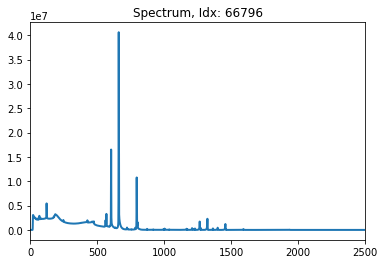

In [26]:
plot_spectrum(df_idx)

## FOR VIZ: Plot Spectrum with Energy Bin Windows

In [36]:
# color dict (use: colors['XColor'])
import ast
with open('../color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [47]:
en_list_pkl = 'idx133717_energy_list_d2auto.pkl' #energy_list_short.pkl, long, or idx133717_energy_list_d*auto.pkl
en_list = pd.read_pickle(results_path + 'detector_response/' + en_list_pkl)

In [28]:
en_delta = 3 #energy window in keV

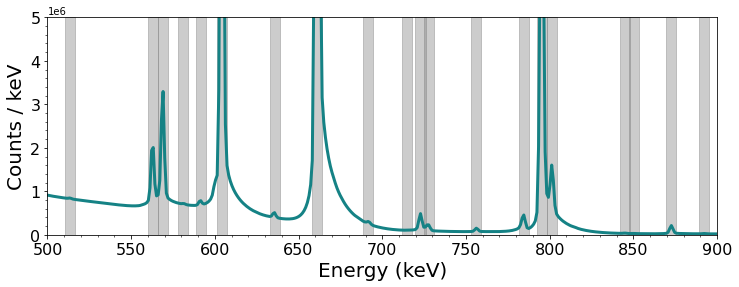

In [49]:
def pres_plot(df_idx):
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(energy_bins, df.loc[df_idx], color=colors['MTeal'], linewidth=3)
    ax.minorticks_on()
    for en in en_list:
        ax.axvspan(en - en_delta, en + en_delta, color='grey', alpha=0.4)
    #ax.set_title('Energy', fontsize=14)
    ax.set_xlim(500, 900)
    ax.set_ylim(0, 5e6)
    ax.set_xlabel('Energy (keV)', fontsize=20)
    ax.set_ylabel('Counts / keV', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    fig.savefig('../plots/energy_window_example.png', bbox_inches='tight', transparent=True)
pres_plot(66796)

In [25]:
def plot_spectrum_withlines(df_idx):
    fig, ax = plt.subplots(4, figsize=(18, 18))
    fig.suptitle('Spectrum, Idx: ' + str(df_idx), fontsize=18)
    for a in ax:
        a.plot(energy_bins, df.loc[df_idx], linewidth = 3)
        a.minorticks_on()
        for en in en_list:
            a.axvline(x=en, color='r', linewidth=0.5)
            a.axvspan(en - en_delta, en + en_delta, color='grey', alpha=0.3)
    ax[0].set_title('Low Energy', fontsize=12)
    ax[0].set_xlim(0, 450)
    ax[0].set_ylim(0, 8e5)
    ax[1].set_title('Med Energy', fontsize=12)
    ax[1].set_xlim(450, 900)
    ax[1].set_ylim(0, 2e5)
    ax[2].set_title('High Energy', fontsize=12)
    ax[2].set_xlim(900, 1700)
    ax[2].set_ylim(0, 5000)
    ax[3].set_title('Highest Energy', fontsize=12)
    ax[3].set_xlim(1700, 3000)
    ax[3].set_ylim(0, 100)
    plt.show()

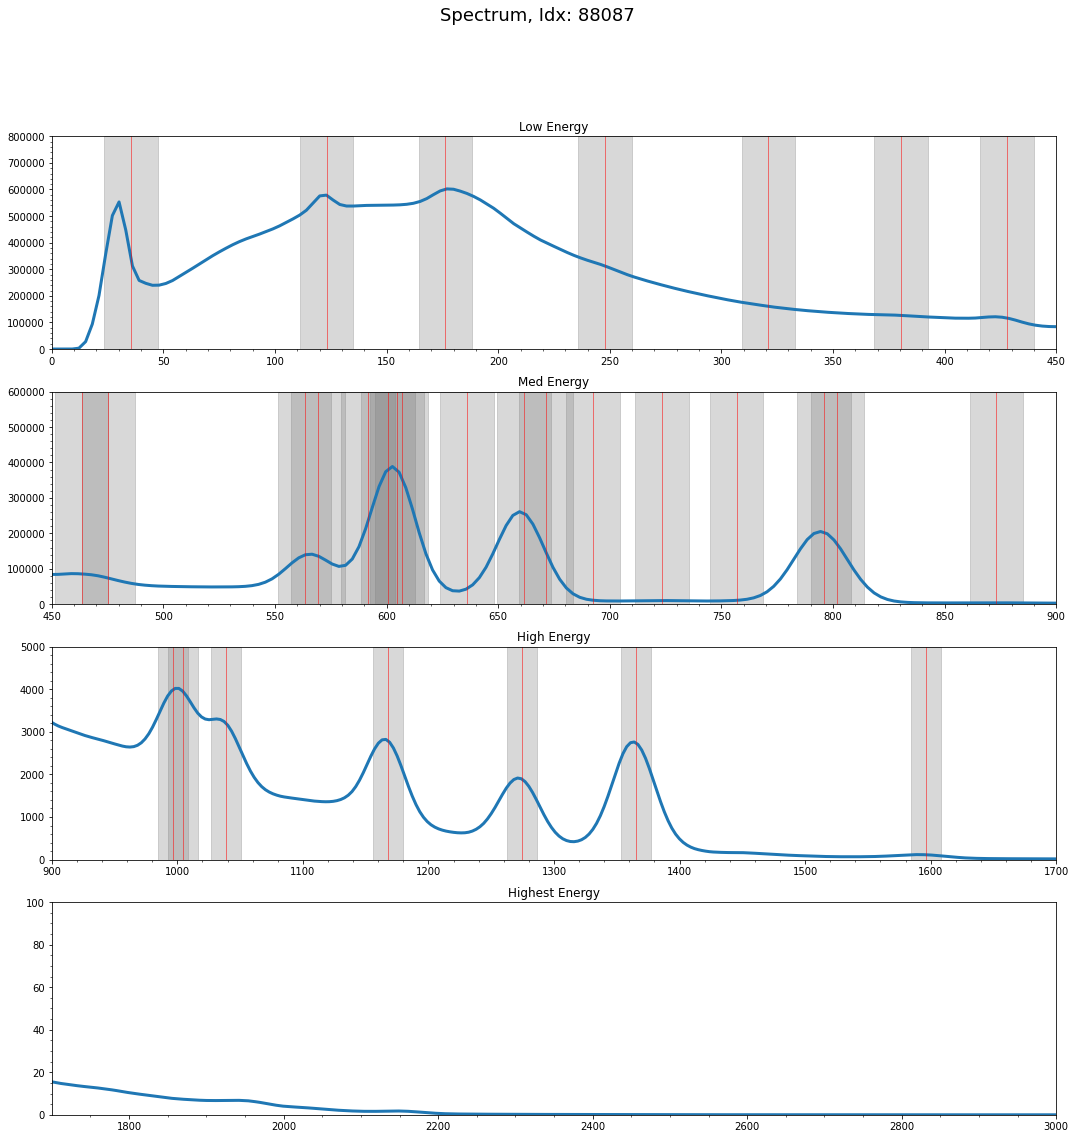

In [23]:
df_idx = 88087
plot_spectrum_withlines(df_idx)

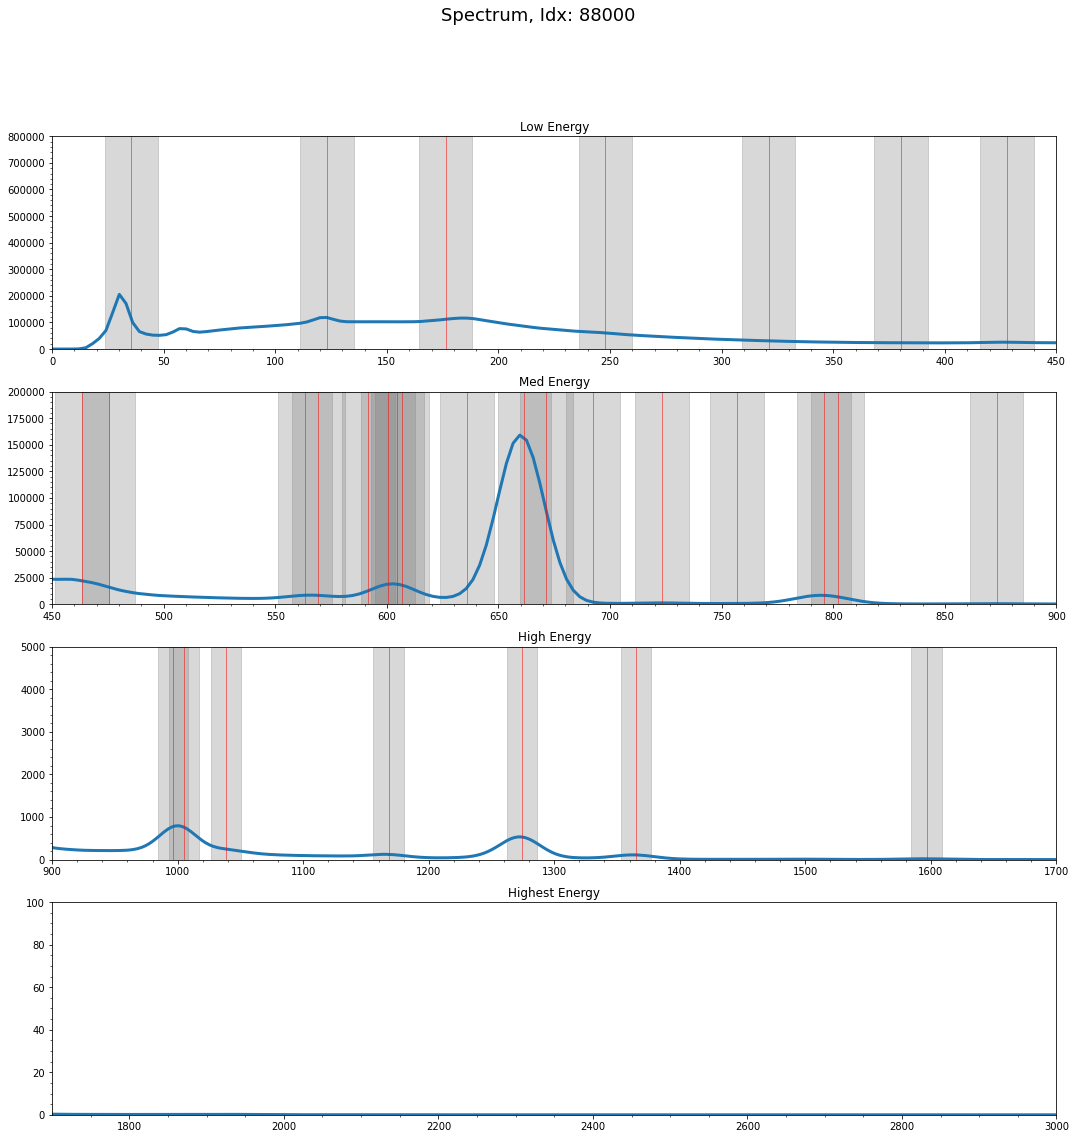

In [26]:
df_idx = 88000
plot_spectrum_withlines(df_idx)